# Exploring Differences Between Income Levels and Education Across Local and International Students in Canada

### ECON 323 Final Project

Shubhleen Dhaka: 94890399 
Flora Fan:44836849 

Github Repository: https://github.com/shubhleendhaka/Data-Science-project

Shubhleen worked on researching for datasets, data extraction, cleaning and visualization.
Flora worked on the topic introduction and data analysis.
The number of international students in Canada increases every year, and many of them come to seek job opportunities. They are from different levels of study and different fields of study across provinces. We will look into income levels of international students who have graduated from their level of univeristy program, compared to that of Canadian students. We will also explore other education and academy-related elements across local and international students in Canada. Since the most of the statistics fall into 2019-2020, we will be focusing on that particular period. 

In [1]:
# import packages and set themes
! pip install chart-studio

import numpy as np
import pandas as pd
import qeds
import requests

import plotly as pt
import plotly.express as px
from chart_studio.plotly import plot, iplot as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode

import seaborn as sns
import matplotlib.colors as mplc
import matplotlib.pyplot as plt

from sklearn import (
    linear_model
)

import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline


We will start by data collecting and cleaning. The first dataset shows the total number of domestic students, international students, and  unknown status of students from 2016 to 2021.

In [2]:
# Load dataset
enrollment_byStatus = pd.read_csv('Status of student.csv')

# Set the 'Status of student in Canada' column as the index
enrollment_byStatus.set_index('Status of student in Canada', inplace=True)
enrollment_byStatus

,2016 / 2017,2017 / 2018,2018 / 2019,2019 / 2020,2020 / 2021
Status of student in Canada,,,,,
Canadian,1798689.0,1802655.0,1798578.0,1781937.0,1790406.0
International,256560.0,296559.0,342009.0,389103.0,373599.0
Not reported,20853.0,17328.0,15519.0,12753.0,7707.0


In the line graph below, we show the trend of number of students in different status. The number of unknown status students are so small that we can ignore it for now. The number of international students has a very slow increase since 2016 until 2019, it began to decrease a bit. Meanwhile, the number of Canadian students has a rather stable trendline, except for 2019, as there was a little drop. Overall, in all years, the number of Canadian students is about 6-7 times larger than international students.

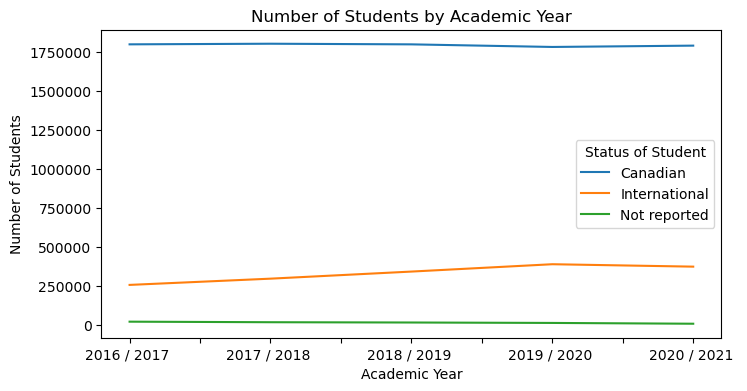

In [3]:
# Plot a line graph
ax = enrollment_byStatus.T.plot(kind='line', figsize=(8, 4))
ax.ticklabel_format(axis='y', style='plain')
plt.title('Number of Students by Academic Year')
plt.xlabel('Academic Year')
plt.ylabel('Number of Students')
plt.legend(title='Status of Student')
plt.show()

The next dataset shows the number of students in 3 status across different levels of study.

In [4]:
program_byStatus = pd.read_csv('Instructional programs by status.csv')
program_byStatus

# Set the 'Instructional Programs' column as the index
program_byStatus.set_index('Instructional Programs', inplace=True)

# make the data numeric
program_byStatus['Canadian Student'] = pd.to_numeric(program_byStatus['Canadian Student'])
program_byStatus['International Student'] = pd.to_numeric(program_byStatus['International Student'])
program_byStatus['Not Reported'] = pd.to_numeric(program_byStatus['Not Reported'])

program_byStatus

,Canadian Student,International Student,Not Reported
Instructional Programs,,,
Science and science technology,193482,34716,24
Engineering and engineering technology,135939,55674,378
Mathematics and computer and information sciences,81006,44556,138
Business and administration,264726,112989,588
Arts and humanities,283002,42252,516
Social and behavioural sciences,218349,38949,87
Legal professions and studies,29985,2115,36
Health care,207963,14925,129
Education and teaching,89367,3507,51


We will be focusing on statistics about Canadian students and international students. As the horizontal bar graph indicated below, no matter which program the students are in, the number of Canadian students is always higher than international students. To be specific, a large portion of Canadian students are in arts and humanities and business related program, while international students also prefer business program,and engineering program, which is different from local. 

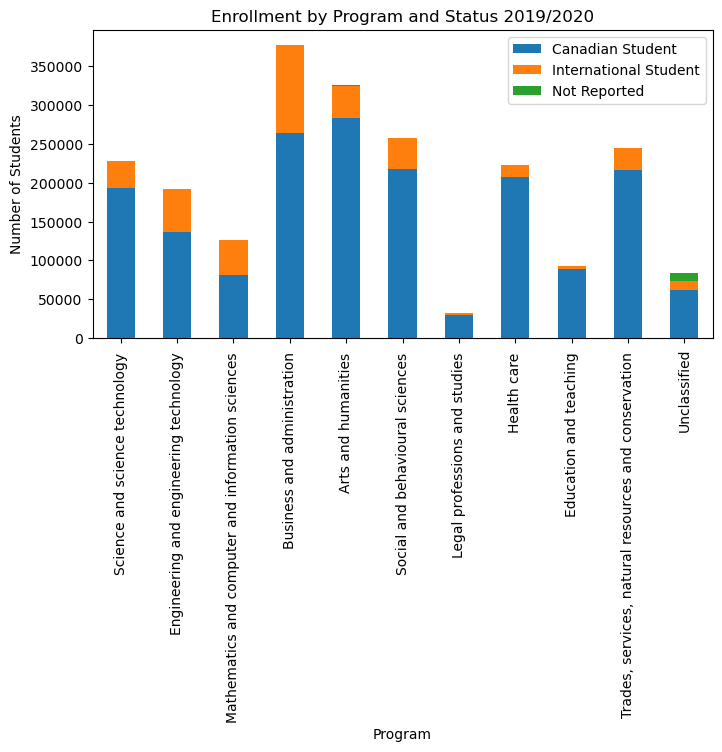

In [5]:
ax = program_byStatus.plot(kind='bar', stacked=True, figsize=(8, 4))
ax.set_title('Enrollment by Program and Status 2019/2020')
ax.set_xlabel('Program')
ax.set_ylabel('Number of Students')
plt.show()

Now, let's see tuition fees in dollar units across Canadian provinces for undergraduate and graduate students each year from 2018 to 2023.

In [6]:
tuition_byProvince_all = pd.read_csv("Canadian and International tuition fee by level of study and province.csv")
tuition_byProvince_all

,REF_DATE,GEO,DGUID,Level of study,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018/2019,Newfoundland and Labrador,2016A000210,Canadian undergraduate,Constant dollars,370,units,0,v1411954029,2.1,3154.0,NaN,NaN,NaN,0
1,2019/2020,Newfoundland and Labrador,2016A000210,Canadian undergraduate,Constant dollars,370,units,0,v1411954029,2.1,3098.0,NaN,NaN,NaN,0
2,2020/2021,Newfoundland and Labrador,2016A000210,Canadian undergraduate,Constant dollars,370,units,0,v1411954029,2.1,3181.0,NaN,NaN,NaN,0
3,2021/2022,Newfoundland and Labrador,2016A000210,Canadian undergraduate,Constant dollars,370,units,0,v1411954029,2.1,3025.0,NaN,NaN,NaN,0
4,2022/2023,Newfoundland and Labrador,2016A000210,Canadian undergraduate,Constant dollars,370,units,0,v1411954029,2.1,3225.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2018/2019,Yukon,2016A000260,International graduate,Constant dollars,370,units,0,v1411954072,12.4,NaN,..,NaN,NaN,0
216,2019/2020,Yukon,2016A000260,International graduate,Constant dollars,370,units,0,v1411954072,12.4,NaN,..,NaN,NaN,0
217,2020/2021,Yukon,2016A000260,International graduate,Constant dollars,370,units,0,v1411954072,12.4,NaN,..,NaN,NaN,0
218,2021/2022,Yukon,2016A000260,International graduate,Constant dollars,370,units,0,v1411954072,12.4,NaN,..,NaN,NaN,0


The original column name may be cofusing for research, so we rename it to make it easier for us to filter the data. We also need to drop the missing values to avoid biased results in the near future. A head of the cleaned data is showed below.

In [7]:
# Data cleaning
# Rename columns
tuition_byProvince_all = tuition_byProvince_all.rename(columns={
    'REF_DATE': 'Year',
    'GEO': 'Location',
    'Level': 'Level of Study',
    'VALUE': 'Tuition'
})


# Filter columns
tuition_byProvince_all = tuition_byProvince_all[['Year', 'Location', 'Level of study', 'Tuition']]

# Drop rows or columns with missing values
tuition_byProvince_all = tuition_byProvince_all.dropna()

# Print the first 5 rows
tuition_byProvince_all.head()

,Year,Location,Level of study,Tuition
0,2018/2019,Newfoundland and Labrador,Canadian undergraduate,3154.0
1,2019/2020,Newfoundland and Labrador,Canadian undergraduate,3098.0
2,2020/2021,Newfoundland and Labrador,Canadian undergraduate,3181.0
3,2021/2022,Newfoundland and Labrador,Canadian undergraduate,3025.0
4,2022/2023,Newfoundland and Labrador,Canadian undergraduate,3225.0


Here's a table indicating the average tuition fee between domestic and international students of undergrad and grad level across the provinces from 2018 to 2023. 

In [8]:
# Group the data by province and level of study and calculate the average tuition fee for each group from 2018-2023
grouped = tuition_byProvince_all.groupby(['Location', 'Level of study'])['Tuition'].mean().rename("Average Tuition").reset_index()
print("Average Tuition fee by province and level of study from 2018-2023")
grouped


Average Tuition fee by province and level of study from 2018-2023


,Location,Level of study,Average Tuition
0,Alberta,Canadian graduate,6819.0
1,Alberta,Canadian undergraduate,6347.4
2,Alberta,International graduate,14492.2
3,Alberta,International undergraduate,25899.0
4,British Columbia,Canadian graduate,9599.8
5,British Columbia,Canadian undergraduate,6120.2
6,British Columbia,International graduate,20051.2
7,British Columbia,International undergraduate,29460.6
8,Manitoba,Canadian graduate,5280.4
9,Manitoba,Canadian undergraduate,4946.8


In [9]:
#create a subset of the original dataframe that contains only the rows where the Year column is equal to 2019/2020 
tuition_byProvince_2019_2020 = tuition_byProvince_all[tuition_byProvince_all['Year'] == '2019/2020']
tuition_byProvince_2019_2020

,Year,Location,Level of study,Tuition
1,2019/2020,Newfoundland and Labrador,Canadian undergraduate,3098.0
6,2019/2020,Newfoundland and Labrador,Canadian graduate,3013.0
11,2019/2020,Newfoundland and Labrador,International undergraduate,12476.0
16,2019/2020,Newfoundland and Labrador,International graduate,4257.0
21,2019/2020,Prince Edward Island,Canadian undergraduate,7026.0
26,2019/2020,Prince Edward Island,Canadian graduate,5202.0
31,2019/2020,Prince Edward Island,International undergraduate,21533.0
36,2019/2020,Prince Edward Island,International graduate,10493.0
41,2019/2020,Nova Scotia,Canadian undergraduate,8827.0
46,2019/2020,Nova Scotia,Canadian graduate,9891.0


Let's pull the data for 2019/2020 to look at the average undergraduate and graduate tuition fees for Canada and internationally. Then, we'll also look at each province.

In [10]:
# Now, let's look at this subset

# Mean tuition cost by level of study
print("Mean tuition cost by level of study in Postsecondary institutes in Canada (2019-2020")
print(tuition_byProvince_2019_2020.groupby('Level of study')['Tuition'].mean())

print("\n\n")

# Mean tuition cost by location and level of study
print("Mean tuition cost by location and level of study in Postsecondary institutes in Canada (2019-2020")
print(tuition_byProvince_2019_2020.groupby(['Location', 'Level of study'])['Tuition'].mean())


Mean tuition cost by level of study in Postsecondary institutes in Canada (2019-2020
Level of study
Canadian graduate               6442.900000
Canadian undergraduate          6125.727273
International graduate         14072.400000
International undergraduate    22465.600000
Name: Tuition, dtype: float64



Mean tuition cost by location and level of study in Postsecondary institutes in Canada (2019-2020
Location                   Level of study             
Alberta                    Canadian graduate               7027.0
                           Canadian undergraduate          5926.0
                           International graduate         11760.0
                           International undergraduate    22785.0
British Columbia           Canadian graduate               9420.0
                           Canadian undergraduate          6180.0
                           International graduate         19948.0
                           International undergraduate    28404.0
Manitoba  

Given the second table above, we use bar plot to see clearly the statistics across provinces. Since some of the data are missing for Yukon, we will only compare the statistics of Canadian undergraduate students in Yukon with other provinces. As the plot shows, international students across different provinces still have the highest tuition fee, except in Nova Scotia. International graduate students have just a bit higher prices over international undergraduate students, which makes international graduate tuition fee the highest in Nova Scotia. Specifically, tuition fee for international undergraduate in Ontario is the highest, over \\$4000\. The tuition fee for international graduate students is also varied across provinces, with Ontario still ranks the highest. For Canadian undergraduate and graduate students, the tuition fee is less variable than that of international undergraduate and graduate students in Canada. Most of them ranges from \\$5000 to \\$10000\, while only few of provinces have both undergraduate and graduate tuition fee under \\$5000\. 

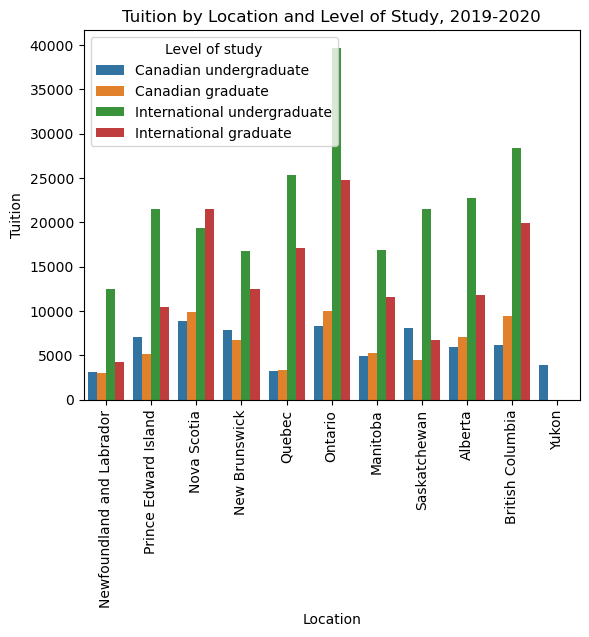

In [11]:
# Data Visualization 
# Create a bar plot with separate bars for each level of study
sns.barplot(x="Location", y="Tuition", hue="Level of study", data=tuition_byProvince_2019_2020)

# Add title and labels to the plot
plt.title("Tuition by Location and Level of Study, 2019-2020")
plt.xlabel("Location")
plt.ylabel("Tuition")
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [12]:
# Let's look at the breakdown of tuition fees by field of study and level of study in Canada for 2019-2020
canadianUNGRAD_tuition_byField = pd.read_csv('Canadian undergraduate tuition fees by field of study 2019-2020.csv.csv')
canadianGRAD_tuition_byField = pd.read_csv('Canadian graduate tuition fees by field of study 2019-2020.csv')
intlUNGRAD_tuition_byField = pd.read_csv('International undergraduate tuition fees by field of study 2019-2020.csv')
intlGRAD_tuition_byField = pd.read_csv('International graduate tuition fees by field of study 2019-2020.csv')


#Data cleaning
# Rename columns
canadianUNGRAD_tuition_byField = canadianUNGRAD_tuition_byField.rename(columns={
    'REF_DATE': 'Year',
    'GEO': 'Location',
    'VALUE': 'CAN UG Tuition'
})

canadianGRAD_tuition_byField = canadianGRAD_tuition_byField.rename(columns={
    'REF_DATE': 'Year',
    'GEO': 'Location',
    'VALUE': 'CAN GRAD Tuition'
})

intlUNGRAD_tuition_byField = intlUNGRAD_tuition_byField.rename(columns={
    'REF_DATE': 'Year',
    'GEO': 'Location',
    'VALUE': 'INTL UG Tuition'
})

intlGRAD_tuition_byField = intlGRAD_tuition_byField.rename(columns={
    'REF_DATE': 'Year',
    'GEO': 'Location',
    'VALUE': 'INTL GRAD Tuition'
})

# Filter columns
canadianUNGRAD_tuition_byField = canadianUNGRAD_tuition_byField[['Year', 'Location', 'Field of study', 'CAN UG Tuition']]
canadianGRAD_tuition_byField = canadianGRAD_tuition_byField[['Year', 'Location', 'Field of study', 'CAN GRAD Tuition']]
intlUNGRAD_tuition_byField = intlUNGRAD_tuition_byField[['Year', 'Location', 'Field of study', 'INTL UG Tuition']]
intlGRAD_tuition_byField = intlGRAD_tuition_byField[['Year', 'Location', 'Field of study', 'INTL GRAD Tuition']]


The table below shows the tuition fee in different fields of study between Canadian and international students in undergraduate and graduate level. The first row indicates the average tuition counting in all fields of study, and then specifies each field's tuition in each row. We also draw a horizontal bar chart here. Just like we dicussed at the beginning, international undergraduate students pay the highest tuition, even in different programs. 

/tmp/ipykernel_904/3173037791.py:3: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Year_x', 'Location_x'} in the result is deprecated and will raise a MergeError in a future version.



                                       Field of study  CAN UG Tuition  \
0                               Total, field of study          6468.0   
1                                           Education          4648.0   
2   Visual and performing arts, and communications...          5789.0   
3                                          Humanities          5486.0   
4   Social and behavioural sciences, and legal stu...          5555.0   
5                                                 Law         12527.0   
6      Business, management and public administration          6795.0   
7         Physical and life sciences and technologies          6068.0   
8      Mathematics, computer and information sciences          6814.0   
9                                         Engineering          7949.0   
10                                       Architecture          6470.0   
11    Agriculture, natural resources and conservation          5614.0   
12                                          Dentist

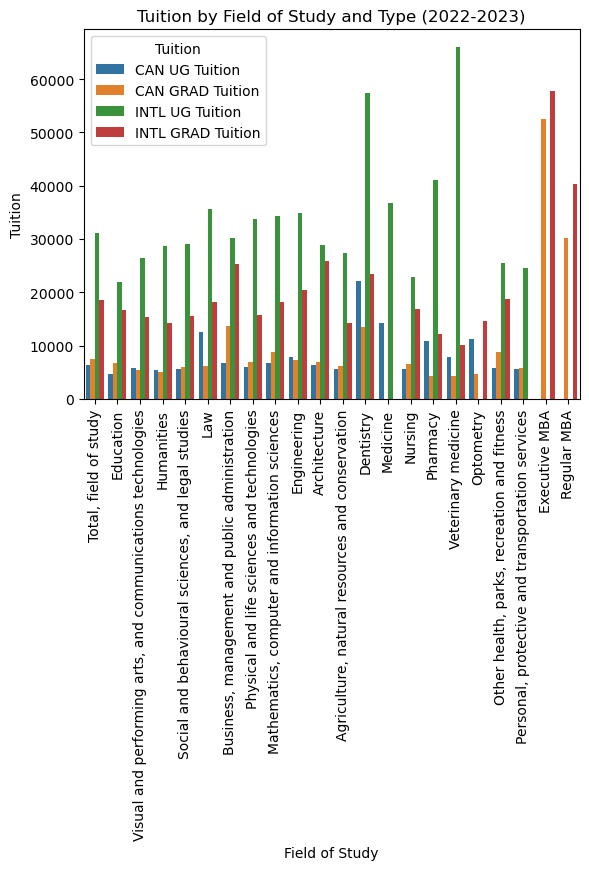

In [13]:
merged_df = pd.merge(canadianUNGRAD_tuition_byField, canadianGRAD_tuition_byField, on='Field of study', how='outer')
merged_df = pd.merge(merged_df, intlUNGRAD_tuition_byField, on='Field of study', how='outer')
merged_df = pd.merge(merged_df, intlGRAD_tuition_byField, on='Field of study', how='outer')


merged_df = merged_df[['Field of study', 'CAN UG Tuition', 'CAN GRAD Tuition', 'INTL UG Tuition', 'INTL GRAD Tuition']]

print(merged_df)

merged_df.to_csv('new csv.csv')

# Select the columns of interest
df = merged_df[['Field of study', 'CAN UG Tuition', 'CAN GRAD Tuition', 'INTL UG Tuition', 'INTL GRAD Tuition']]

# Melt the data to create a long format
df_melt = df.melt(id_vars='Field of study', var_name='Tuition', value_name='Amount')

# Create the bar plot
sns.barplot(x='Field of study', y='Amount', hue='Tuition', data=df_melt)

# Add title and labels to the plot
plt.title("Tuition by Field of Study and Type (2022-2023)")
plt.xlabel("Field of Study")
plt.ylabel("Tuition")
plt.xticks(rotation=90)

# Show the plot
plt.show()


Let's include income level for both Canadian and international students after graduation in Canada in 2019. 

In [14]:
# Let's now look at the income after graduation for Canadian and International graduated students in Canada
# This Dataset is for the year 2019
can_graduates_income2019 = pd.read_csv('Canadian Median income two years after graduation.csv')
intl_graduates_income2019 = pd.read_csv('International Median income two years after graduation.csv')

#Data cleaning
# Insert '0' in place of NULL values
can_graduates_income2019.fillna(0, inplace=True)
intl_graduates_income2019.fillna(0, inplace=True)

print(can_graduates_income2019.head())
print('\n\n\n')
print(intl_graduates_income2019.head())


                           Educational qualification  \
0  Career, technical or professional training cer...   
1  Career, technical or professional training cer...   
2  Career, technical or professional training cer...   
3  Career, technical or professional training cer...   
4  Career, technical or professional training cer...   

                                      Field of Study  Number of graduates  \
0                                         Education                1040.0   
1  Visual and performing arts, and communications...               1020.0   
2                                        Humanities                1240.0   
3           Social and behavioural sciences and law                1690.0   
4    Business, management and public administration                3920.0   

   Median employment income  
0                   31000.0  
1                   21100.0  
2                   20700.0  
3                   37100.0  
4                   39000.0  




                

If we group the income level by level of study (let's focus on undergraduate, master, and doctoral), we see that people with doctoral degree has the highest income, followed by master degree, and the lowest falls into undergraduate degree. Comparing between Canadian and international students, for all levels of study, it seems like Canadians always have higher income level than international students.For international students, as level of degree goes higher, their income also increases at a steady pace. However, for Canadian students, if they have a master degree or higher, their income level has a small jump from Bachelor degree. 

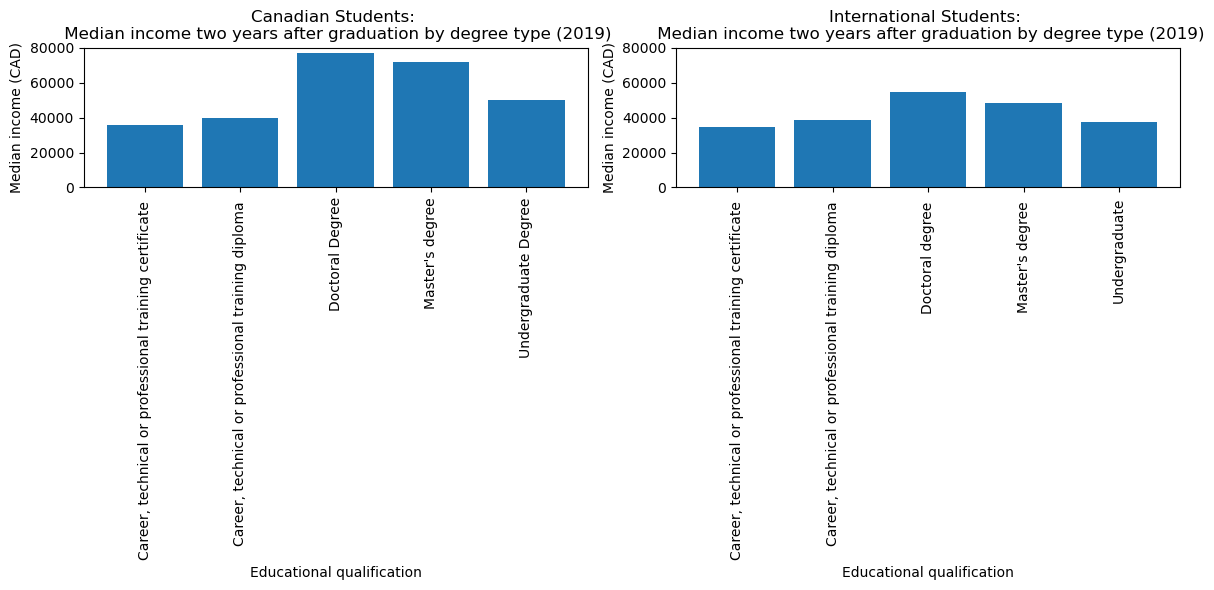

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Group the data by degree type and calculate the median income for each group
can_median_income_by_degree = can_graduates_income2019.groupby('Educational qualification')['Median employment income'].median()

# Create a bar graph for Canadian students
ax[0].bar(can_median_income_by_degree.index, can_median_income_by_degree.values)
ax[0].set_xlabel('Educational qualification')
ax[0].set_ylabel('Median income (CAD)')
ax[0].set_title('Canadian Students: \n Median income two years after graduation by degree type (2019)')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylim(0, 80000)

# Group the data by degree type and calculate the median income for each group
intl_median_income_by_degree = intl_graduates_income2019.groupby('Educational qualification')['Median employment income'].median()

# Create a bar graph for international students
ax[1].bar(intl_median_income_by_degree.index, intl_median_income_by_degree.values)
ax[1].set_xlabel('Educational qualification')
ax[1].set_ylabel('Median income (CAD)')
ax[1].set_title('International Students: \n Median income two years after graduation by degree type (2019)')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_ylim(0, 80000)

plt.tight_layout()
plt.show()



Here's a table indicating the average tuition fee between domestic and international students of undergrad and grad level across the provinces from 2018 to 2023. 

In [16]:
tuition_field_all = pd.read_csv('Tuition and level of study.csv')
tuition_field_all

,Geography,Level of study,Mean Tuition: 2018 / 2019,Mean Tuition: 2019 / 2020,Mean Tuition: 2020 / 2021,Mean Tuition: 2021 / 2022,Mean Tuition: 2022 / 2023
0,Canada,Canadian undergraduate,"6,822","6,468","6,580","6,660","6,834"
1,Canada,Canadian graduate,"7,388","7,186","7,361","7,315","7,437"
2,Canada,International undergraduate,"27,613","29,883","32,039","33,446","36,123"
3,Canada,International graduate,"16,995","17,934","19,429","20,246","21,111"


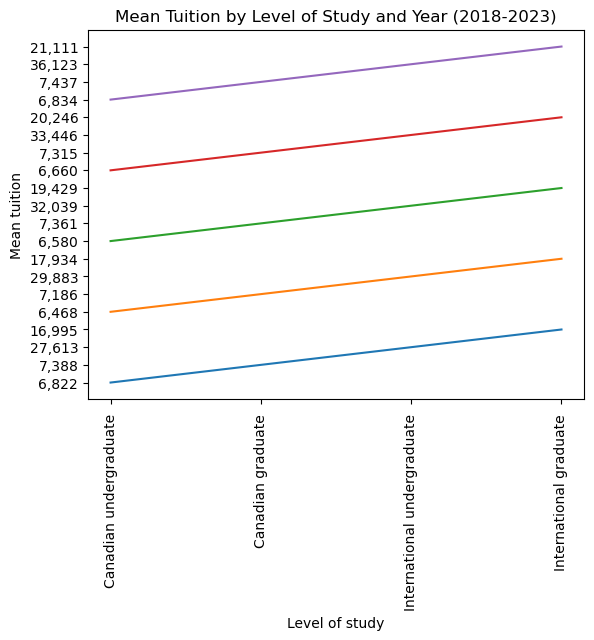

In [17]:
# Remove extra spaces in column names
tuition_field_all.columns = tuition_field_all.columns.str.strip()

# Set the level of study as the x-axis and mean tuition as the y-axis
x = tuition_field_all['Level of study']
y_2018_2019 = tuition_field_all['Mean Tuition: 2018 / 2019']
y_2019_2020 = tuition_field_all['Mean Tuition: 2019 / 2020']
y_2020_2021 = tuition_field_all['Mean Tuition: 2020 / 2021']
y_2021_2022 = tuition_field_all['Mean Tuition: 2021 / 2022']
y_2022_2023 = tuition_field_all['Mean Tuition: 2022 / 2023']

# Create a line graph with multiple lines
plt.plot(x, y_2018_2019, label='2018/2019')
plt.plot(x, y_2019_2020, label='2019/2020')
plt.plot(x, y_2020_2021, label='2020/2021')
plt.plot(x, y_2021_2022, label='2021/2022')
plt.plot(x, y_2022_2023, label='2022/2023')

# Add labels and title to the graph
plt.xlabel('Level of study')
plt.ylabel('Mean tuition')
plt.title('Mean Tuition by Level of Study and Year (2018-2023)')
plt.tick_params(axis='x', rotation=90)


# Show the graph
plt.show()

This makes us think: regardless of other factors (tuition, levels of study, fields of study), as the number of Canadian students is already higher than international students, can it be the direct cause to such high income among Canadian students? Let’s figure it out by linear regression. 

## Linear Regression

Since we are wondering if number of students can be causing such high income among Canadian students, we run a simple linear regression regarding number of the graduated students and their income. It seems to be not the case: the trendline of international students is more tilted than Canadian students, indicating number of international students has more effect on their income than Canadian students do. However, we are still lacking determinants to finally decide what’s the ‘real’ determinants of higher income of Canadian students. 

New simple linear model: Median income = 51224.8912 + 0.0807 graduates


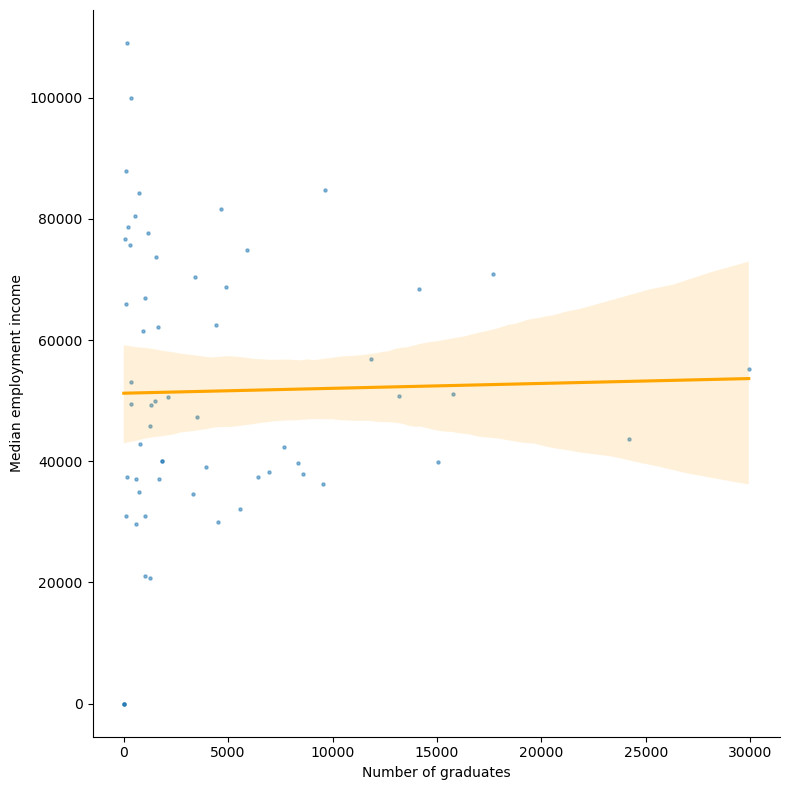

In [20]:
from sklearn.linear_model import LinearRegression
# Split the data into features (X) and target variable (y)
X = can_graduates_income2019.copy()
y = can_graduates_income2019['Median employment income']

model = LinearRegression()
model.fit(can_graduates_income2019[['Number of graduates']], y)

newbeta_0 = model.intercept_
newbeta_1 = model.coef_[0]

print(f"New simple linear model: Median income = {newbeta_0:.4f} + {newbeta_1:.4f} graduates")

sns.lmplot(
    data=can_graduates_income2019, x="Number of graduates", y="Median employment income", height=8,
    scatter_kws=dict(s=5, alpha=0.5),
    line_kws={'color': 'orange'}
);



New simple linear model: Median income = 38247.9472 + 1.4290 graduates


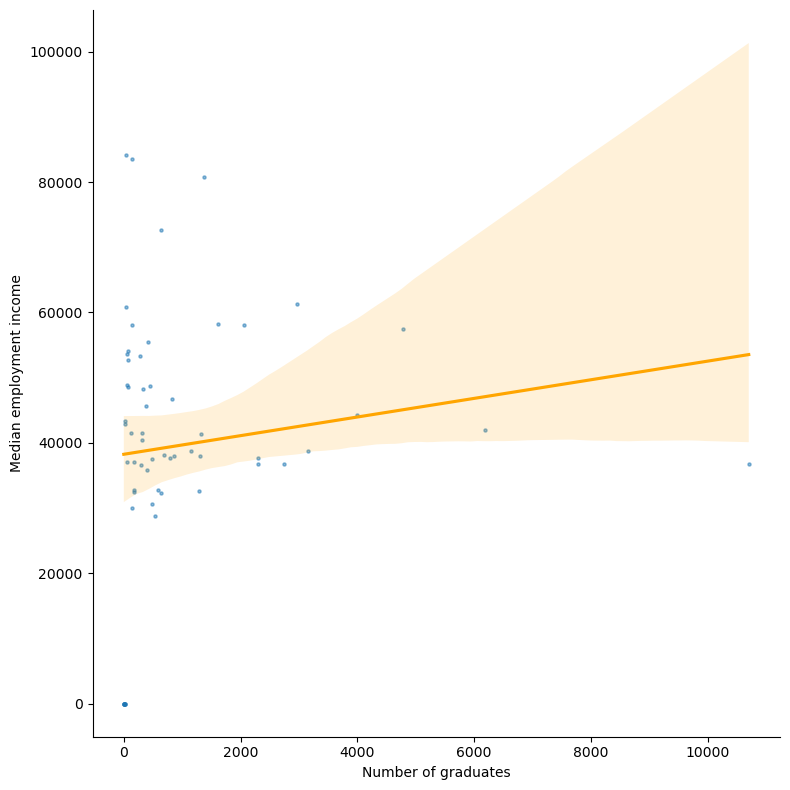

In [21]:
# Split the data into features (X) and target variable (y)
X = intl_graduates_income2019.copy()
y = intl_graduates_income2019['Median employment income']

model = LinearRegression()
model.fit(intl_graduates_income2019[['Number of graduates']], y)

newbeta_0 = model.intercept_
newbeta_1 = model.coef_[0]

print(f"New simple linear model: Median income = {newbeta_0:.4f} + {newbeta_1:.4f} graduates")

sns.lmplot(
    data=intl_graduates_income2019, x="Number of graduates", y="Median employment income", height=8,
    scatter_kws=dict(s=5, alpha=0.5),
    line_kws={'color': 'orange'}
);


The intercept in the linear regression of Canadian tudents is larger than that of international students, indicating initially, Canadian students will have a higher income than international students after graduation. Now, looking at the coefficient for both regression models, it seems like the number of international students is more effective on their income than Canadian students do. Therefore, number of students is not a big cause for high income for Canadian students. There are definitely other factors influencing the income level, which can be referred to the previous explanation we had. 

## Conclusion

As a result, we have these takeaways:
1. Large numbers of workers is not the key determinant to the result of high income levels overall;
2. As you get higher and higher degree of study, you will be paid more. So definitely keep studying!
3. The reason that international undergraduate students can have such higher tuition is they are more involving in science related program than Canadian students do.

Limitations: since the data we focus on are less numerical, in other words, if we include them into the linear regression, there will be problems with overfitting because they are all "dummy variables". If we were able to find other numerical data, we can do linear regression with multiple variables, instead of setting only one independeng variable. In this way, we could've find out more causes.